In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium import plugins
from netCDF4 import Dataset
import cartopy.crs as ccrs
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift
#from mpl_toolkits.basemap import Basemap  <-- can't install resolve later

In [81]:
M1_PATH = 'Madagascarweatherdata1.nc4'
M2_PATH = 'Madagascarweatherdata2.nc4'
M3_PATH = 'Madagascarweatherdata3.nc4'
M4_PATH = 'Madagascarweatherdata4.nc4'
M5_PATH = 'Madagascarweatherdata5.nc4'
M6_PATH = 'Madagascarweatherdata6.nc4'
M7_PATH = 'Madagascarweatherdata7.nc4'

In [82]:
M1_DATA = Dataset(M1_PATH)
M2_DATA = Dataset(M2_PATH)
M3_DATA = Dataset(M3_PATH)
M4_DATA = Dataset(M4_PATH)
M5_DATA = Dataset(M5_PATH)
M6_DATA = Dataset(M6_PATH)
M7_DATA = Dataset(M7_PATH)

In [83]:
# print specifics when needed
print(repr(M1_DATA))
print(repr(M2_DATA))
print(repr(M3_DATA))
print(repr(M4_DATA))
print(repr(M5_DATA))
print(repr(M6_DATA))
print(repr(M7_DATA))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(33), latitude(63)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 rhoa(time, latitude, longitude)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(33), latitude(63)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 prectot(time, latitude, longitude), float32 prmc(time, latitude, longitude), float32 grn(time, latitude, longitude), float32 evland(time, latitude, longitude), float32 teland(time, latitude, longitude), float32 evpintr(time, lati

In [84]:
M_Data_List = [M1_DATA, M2_DATA, M3_DATA, M4_DATA, M5_DATA, M6_DATA, M7_DATA]

In [85]:
#printing a workable variable list
print("DATA 1")
print(M1_DATA.variables.keys())
print("\n")
print("DATA 2")
print(M2_DATA.variables.keys())
print("\n")
print("DATA 3")
print(M3_DATA.variables.keys())
print("\n")
print("DATA 4")
print(M4_DATA.variables.keys())
print("\n")
print("DATA 5")
print(M5_DATA.variables.keys())
print("\n")
print("DATA 6")
print(M6_DATA.variables.keys())
print("\n")
print("DATA 7")
print(M7_DATA.variables.keys())


DATA 1
dict_keys(['time', 'longitude', 'latitude', 'rhoa'])


DATA 2
dict_keys(['time', 'longitude', 'latitude', 'prectot', 'prmc', 'grn', 'evland', 'teland', 'evpintr', 'shland'])


DATA 3
dict_keys(['time', 'longitude', 'latitude', 'evapout', 'dtsdt_ana', 'qwarm'])


DATA 4
dict_keys(['time', 'longitude', 'latitude', 'albnirdr', 'albvisdr', 'emis', 'albedo', 'cldtot', 'lwgab', 'swgdn'])


DATA 5
dict_keys(['time', 'longitude', 'latitude', 'ps', 'ts', 'slp', 'cldprs'])


DATA 6
dict_keys(['time', 'longitude', 'latitude', 'nh4cmass', 'so4cmass', 'nicmass', 'sssmass', 'nh3cmass', 'hno3smass', 'bcsmass', 'bccmass', 'so2cmass', 'hno3cmass', 'ducmass', 'nismass', 'nh4smass'])


DATA 7
dict_keys(['time', 'longitude', 'latitude', 'cosc', 'coem', 'cocl', 'copd', 'cols'])


In [86]:
Climate_keys = ['rhoa',
                             'prectot','prmc','grn','evland','teland','evpintr','shland',
                            'evapout','dtsdt_ana','qwarm',
                            'albnirdr','albvisdr','emis','albedo','cldtot','lwgab','swgdn',
                            'ps','ts','slp','cldprs',
                            'nh4cmass','so4cmass','nicmass','sssmass','nh3cmass','hno3smass','bcsmass','bccmass','so2cmass','hno3cmass','ducmass','nismass','nh4smass',
                            'cosc','coem','cocl','copd','cols']

In [87]:
#Data type check
print(M1_DATA.variables[Climate_keys[0]].long_name)
print(Climate_keys[0])
print(M1_DATA.variables[Climate_keys[0]].datatype)

air_density_at_surface
rhoa
float32


In [88]:
# Dimension control
print(M1_DATA.variables[Climate_keys[0]].long_name)
print(Climate_keys[0])
print(M1_DATA.variables[Climate_keys[0]].dimensions)

air_density_at_surface
rhoa
('time', 'latitude', 'longitude')


In [89]:
#testing specific parts of the list
print(M1_DATA.variables[Climate_keys[0]].long_name)
print(Climate_keys[0])
print(M1_DATA.variables[Climate_keys[0]].dimensions)

air_density_at_surface
rhoa
('time', 'latitude', 'longitude')


In [90]:
for picking_keys in Climate_keys[1:8]:
    print(M2_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M2_DATA.variables[picking_keys].dimensions)
    print("\n")

total_precipitation
prectot
('time', 'latitude', 'longitude')


water_profile
prmc
('time', 'latitude', 'longitude')


greenness_fraction
grn
('time', 'latitude', 'longitude')


Evaporation_land
evland
('time', 'latitude', 'longitude')


Total_energy_storage_land
teland
('time', 'latitude', 'longitude')


interception_loss_energy_flux
evpintr
('time', 'latitude', 'longitude')


Sensible_heat_flux_land
shland
('time', 'latitude', 'longitude')




In [91]:
for picking_keys in Climate_keys[8:11]:
    print(M3_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M3_DATA.variables[picking_keys].dimensions)
    print("\n")

evaporation
evapout
('time', 'latitude', 'longitude')


total_skin_temperature_tendency
dtsdt_ana
('time', 'latitude', 'longitude')


net_heating_in_warm_layer
qwarm
('time', 'latitude', 'longitude')




In [92]:
for picking_keys in Climate_keys[11:18]:
    print(M4_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M4_DATA.variables[picking_keys].dimensions)
    print("\n")

surface_albedo_for_near_infrared_beam
albnirdr
('time', 'latitude', 'longitude')


surface_albedo_for_visible_beam
albvisdr
('time', 'latitude', 'longitude')


surface_emissivity
emis
('time', 'latitude', 'longitude')


surface_albedo
albedo
('time', 'latitude', 'longitude')


total_cloud_area_fraction
cldtot
('time', 'latitude', 'longitude')


surface_absorbed_longwave_radiation
lwgab
('time', 'latitude', 'longitude')


surface_incoming_shortwave_flux
swgdn
('time', 'latitude', 'longitude')




In [93]:
for picking_keys in Climate_keys[18:22]:
    print(M5_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M5_DATA.variables[picking_keys].dimensions)
    print("\n")

surface_pressure
ps
('time', 'latitude', 'longitude')


surface_skin_temperature
ts
('time', 'latitude', 'longitude')


sea_level_pressure
slp
('time', 'latitude', 'longitude')


cloud_top_pressure
cldprs
('time', 'latitude', 'longitude')




In [94]:
for picking_keys in Climate_keys[22:35]:
    print(M6_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M6_DATA.variables[picking_keys].dimensions)
    print("\n")

Ammonium Column Mass Density __ENSEMBLE__
nh4cmass
('time', 'latitude', 'longitude')


SO4 Column Mass Density __ENSEMBLE__
so4cmass
('time', 'latitude', 'longitude')


Nitrate Column Mass Density __ENSEMBLE__
nicmass
('time', 'latitude', 'longitude')


Sea Salt Surface Mass Concentration __ENSEMBLE__
sssmass
('time', 'latitude', 'longitude')


Ammonia Column Mass Density __ENSEMBLE__
nh3cmass
('time', 'latitude', 'longitude')


Nitric Acid Surface Mass Concentration __ENSEMBLE__
hno3smass
('time', 'latitude', 'longitude')


Black Carbon Surface Mass Concentration __ENSEMBLE__
bcsmass
('time', 'latitude', 'longitude')


Black Carbon Column Mass Density __ENSEMBLE__
bccmass
('time', 'latitude', 'longitude')


SO2 Column Mass Density __ENSEMBLE__
so2cmass
('time', 'latitude', 'longitude')


Nitric Acid Column Mass Density __ENSEMBLE__
hno3cmass
('time', 'latitude', 'longitude')


Dust Column Mass Density __ENSEMBLE__
ducmass
('time', 'latitude', 'longitude')


Nitrate Surface Mass Concen

In [95]:
for picking_keys in Climate_keys[35:]:
    print(M7_DATA.variables[picking_keys].long_name)
    print(picking_keys)
    print(M7_DATA.variables[picking_keys].dimensions)
    print("\n")
#Note to self multi files are suffering

CO Surface Concentration in ppbv __ENSEMBLE__
cosc
('time', 'latitude', 'longitude')


CO Emission __ENSEMBLE__
coem
('time', 'latitude', 'longitude')


CO Column Burden __ENSEMBLE__
cocl
('time', 'latitude', 'longitude')


CO Chemical Production __ENSEMBLE__
copd
('time', 'latitude', 'longitude')


CO Chemical Loss __ENSEMBLE__
cols
('time', 'latitude', 'longitude')




In [96]:
M1_longitude = M1_DATA.variables['longitude'][:]
M1_latitude = M1_DATA.variables['latitude'][:]
M1_rhoa = M1_DATA.variables['rhoa'][0,:,:]
M2_longitude = M2_DATA.variables["longitude"][:]
M2_latitude = M2_DATA.variables["latitude"][:]

M2_prectot = M2_DATA.variables["prectot"][0,:,:]
M2_prmc = M2_DATA.variables["prmc"][0,:,:]
M2_grn = M2_DATA.variables["grn"][0,:,:]
M2_evland = M2_DATA.variables["evland"][0,:,:]
M2_teland = M2_DATA.variables["teland"][0,:,:]
M2_evpintr = M2_DATA.variables["evpintr"][0,:,:]
M2_shland = M2_DATA.variables["shland"][0,:,:]

M3_longitude = M3_DATA.variables["longitude"][:]
M3_latitude = M3_DATA.variables["latitude"][:]

M3_evapout = M3_DATA.variables["evapout"][0,:,:]
M3_dtsdt_ana = M3_DATA.variables["dtsdt_ana"][0,:,:]
M3_qwarm = M3_DATA.variables["qwarm"][0,:,:]

In [97]:
M4_longitude = M4_DATA.variables["longitude"][:]
M4_latitude = M4_DATA.variables["latitude"][:]

M4_albnirdr = M4_DATA.variables["albnirdr"][0,:,:]
M4_albvisdr = M4_DATA.variables["albvisdr"][0,:,:]
M4_emis = M4_DATA.variables["emis"][0,:,:]
M4_albedo = M4_DATA.variables["albedo"][0,:,:]
M4_cldtot = M4_DATA.variables["cldtot"][0,:,:]
M4_lwgab = M4_DATA.variables["lwgab"][0,:,:]
M4_swgdn = M4_DATA.variables["swgdn"][0,:,:]

M5_longitude = M5_DATA.variables["longitude"][:]
M5_latitude = M5_DATA.variables["latitude"][:]

M5_ps = M5_DATA.variables["ps"][0,:,:]
M5_ts = M5_DATA.variables["ts"][0,:,:]
M5_slp = M5_DATA.variables["slp"][0,:,:]
M5_cldprs = M5_DATA.variables["cldprs"][0,:,:]

M6_longitude = M6_DATA.variables["longitude"][:]
M6_latitude = M6_DATA.variables["latitude"][:]

In [98]:
M6_nh4cmass = M6_DATA.variables["nh4cmass"][0,:,:]
M6_so4cmass = M6_DATA.variables["so4cmass"][0,:,:]
M6_nicmass = M6_DATA.variables["nicmass"][0,:,:]
M6_sssmass = M6_DATA.variables["sssmass"][0,:,:]
M6_nh3cmass = M6_DATA.variables["nh3cmass"][0,:,:]
M6_hno3smass = M6_DATA.variables["hno3smass"][0,:,:]
M6_bcsmass = M6_DATA.variables["bcsmass"][0,:,:]
M6_so2cmass = M6_DATA.variables["so2cmass"][0,:,:]
M6_hno3cmass = M6_DATA.variables["hno3cmass"][0,:,:]
M6_ducmass = M6_DATA.variables["ducmass"][0,:,:]
M6_nismass = M6_DATA.variables["nismass"][0,:,:]
M6_nh4smass = M6_DATA.variables["nh4smass"][0,:,:]

M7_longitude = M7_DATA.variables["longitude"][:]
M7_latitude = M7_DATA.variables["latitude"][:]

M7_cosc = M7_DATA.variables["cosc"][0,:,:]
M7_coem = M7_DATA.variables["coem"][0,:,:]
M7_cocl = M7_DATA.variables["cocl"][0,:,:]
M7_copd = M7_DATA.variables["copd"][0,:,:]
M7_cols = M7_DATA.variables["cols"][0,:,:]

In [99]:
#finally testing actual values.
print("MADAGASCAR")
print("-"*10)
print("MAX")
print(M1_DATA.variables["rhoa"].long_name)
print(M1_DATA.variables["rhoa"][0,:,:].max())
print("---"*20)

print("\n")


MADAGASCAR
----------
MAX
air_density_at_surface
1.2273372
------------------------------------------------------------




In [100]:
# rain and plant related
DATA_2_KEY_LIST = ['prectot', 'prmc', 'grn', 'evland', 'teland', 'evpintr', 'shland']

for x_keys in DATA_2_KEY_LIST:

    print("MADAGASCAR")
    print("-"*10)
    print("MAX")
    print(M2_DATA.variables[x_keys].long_name)
    print("%.5f" % M2_DATA.variables[x_keys][0,:,:].max())

    print("\n")

MADAGASCAR
----------
MAX
total_precipitation
0.00045


MADAGASCAR
----------
MAX
water_profile
0.46900


MADAGASCAR
----------
MAX
greenness_fraction
0.98512


MADAGASCAR
----------
MAX
Evaporation_land
0.00004


MADAGASCAR
----------
MAX
Total_energy_storage_land
854941632.00000


MADAGASCAR
----------
MAX
interception_loss_energy_flux
48.92543


MADAGASCAR
----------
MAX
Sensible_heat_flux_land
14.05942




In [101]:
DATA_3_KEY_LIST = ['evapout', 'dtsdt_ana', 'qwarm']
for x_keys in DATA_3_KEY_LIST:

    print("MADAGASCAR")
    print("-"*10)
    print("MAX")
    print(M3_DATA.variables[x_keys].long_name)
    print("%.5f" % M3_DATA.variables[x_keys][0,:,:].max())

    print("\n")


MADAGASCAR
----------
MAX
evaporation
0.00017


MADAGASCAR
----------
MAX
total_skin_temperature_tendency
0.00005


MADAGASCAR
----------
MAX
net_heating_in_warm_layer
-82.68053




In [103]:
DATA_4_KEY_LIST = ['albnirdr', 'albvisdr', 'emis', 'albedo', 'cldtot', 'lwgab', 'swgdn']
for x_keys in DATA_4_KEY_LIST:

    print("MADAGASCAR")
    print("-"*10)
    print("MAX")
    print(M4_DATA.variables[x_keys].long_name)
    print("%.5f" % M4_DATA.variables[x_keys][0,:,:].max())
    print("\n")

MADAGASCAR
----------
MAX
surface_albedo_for_near_infrared_beam
nan


MADAGASCAR
----------
MAX
surface_albedo_for_visible_beam
nan


MADAGASCAR
----------
MAX
surface_emissivity
0.99477


MADAGASCAR
----------
MAX
surface_albedo
nan


MADAGASCAR
----------
MAX
total_cloud_area_fraction
1.00000


MADAGASCAR
----------
MAX
surface_absorbed_longwave_radiation
412.96539


MADAGASCAR
----------
MAX
surface_incoming_shortwave_flux
0.00000




<ipython-input-103-bb6446af4b5a>:8: UserWarning: Warning: converting a masked element to nan.
  print("%.5f" % M4_DATA.variables[x_keys][0,:,:].max())


In [106]:
# Atmospheric gas data
DATA_6_KEY_LIST = ['nh4cmass', 'so4cmass', 'nicmass', 'sssmass', 'nh3cmass', 'hno3smass', 'bcsmass', 'bccmass', 'so2cmass', 'hno3cmass', 'ducmass', 'nismass', 'nh4smass']
for x_keys in DATA_6_KEY_LIST:

    print("MADAGASCAR")
    print("-"*10)
    print("MAX")
    print(M6_DATA.variables[x_keys].long_name)
    print("%.10f" % M6_DATA.variables[x_keys][0,:,:].max())

    print("\n")

MADAGASCAR
----------
MAX
Ammonium Column Mass Density __ENSEMBLE__
0.0000007924


MADAGASCAR
----------
MAX
SO4 Column Mass Density __ENSEMBLE__
0.0000027087


MADAGASCAR
----------
MAX
Nitrate Column Mass Density __ENSEMBLE__
0.0000017002


MADAGASCAR
----------
MAX
Sea Salt Surface Mass Concentration __ENSEMBLE__
0.0000001128


MADAGASCAR
----------
MAX
Ammonia Column Mass Density __ENSEMBLE__
0.0000157952


MADAGASCAR
----------
MAX
Nitric Acid Surface Mass Concentration __ENSEMBLE__
0.0000000002


MADAGASCAR
----------
MAX
Black Carbon Surface Mass Concentration __ENSEMBLE__
0.0000000017


MADAGASCAR
----------
MAX
Black Carbon Column Mass Density __ENSEMBLE__
0.0000010811


MADAGASCAR
----------
MAX
SO2 Column Mass Density __ENSEMBLE__
0.0000009143


MADAGASCAR
----------
MAX
Nitric Acid Column Mass Density __ENSEMBLE__
0.0000006193


MADAGASCAR
----------
MAX
Dust Column Mass Density __ENSEMBLE__
0.0000080774


MADAGASCAR
----------
MAX
Nitrate Surface Mass Concentration __ENSEM

In [107]:
#CO 2 related
DATA_7_KEY_LIST = ['cosc', 'coem', 'cocl', 'copd', 'cols']
for x_keys in DATA_7_KEY_LIST:

    print("MADAGASCAR")
    print("-"*10)
    print("MAX")
    print(M7_DATA.variables[x_keys].long_name)
    print("%.20f" % M7_DATA.variables[x_keys][0,:,:].max())

    print("\n")


MADAGASCAR
----------
MAX
CO Surface Concentration in ppbv __ENSEMBLE__
152.02938842773437500000


MADAGASCAR
----------
MAX
CO Emission __ENSEMBLE__
0.00000000102409103420


MADAGASCAR
----------
MAX
CO Column Burden __ENSEMBLE__
0.00068282277788966894


MADAGASCAR
----------
MAX
CO Chemical Production __ENSEMBLE__
0.00000000007662524781


MADAGASCAR
----------
MAX
CO Chemical Loss __ENSEMBLE__
0.00000000015598029812




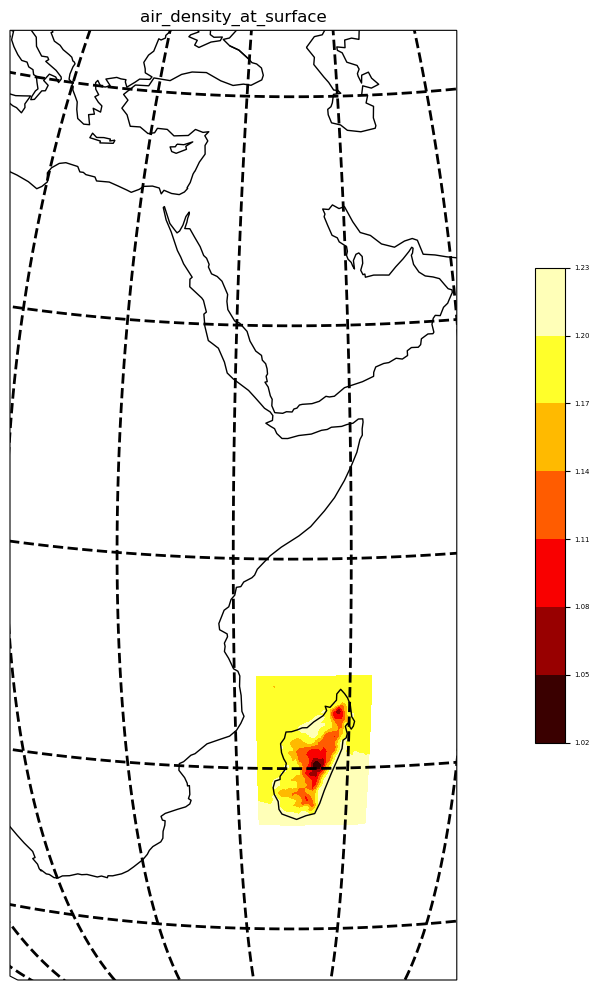

In [116]:
#Data 1
plt.style.use("default")
central_longitude,central_latitude = 45,17
extent_real = [20, 60, 45, -50]
figure = plt.figure(figsize=(16,10))

axis_func = plt.axes(projection=ccrs.Orthographic(central_longitude,central_latitude))
axis_func.set_global()
axis_func.coastlines(resolution="110m",linewidth=1)
axis_func.gridlines(linestyle='--',color='black',linewidth=2)

axis_func.set_extent(extent_real)


plt.contourf(M1_longitude, M1_latitude, M1_rhoa, transform=ccrs.PlateCarree(),cmap="hot")

color_bar_func = plt.colorbar(ax=axis_func, orientation="vertical", pad=0.05, aspect=16, shrink=0.5)
color_bar_func.ax.tick_params(labelsize=5)

plt.title(M1_DATA.variables["rhoa"].long_name)
plt.tight_layout()
plt.show()